# Projet Maths 3

# Questions théoriques

> **1. Quel théorème du cours nous autorise-t-il à estimer l’espérance conditionnelle par la moyenne empirique de simulations conditionnelles.**


> **2. Rappeler la loi conditionnelle du vecteur des composantes de Z correspondant aux points de discrétisation sans observation, connaissant les valeurs prises par les composantes aux sites d’observation.**

Le vecteur aléatoire des composantes de Z correspondant aux points de discrétisation sans observation, connaissant les valeurs prises par les composantes aux sites d’observation, est une variable aléatoire à densité et admet pour densité

En notant Y les valeurs prises aux points de discretisation sans observation et X les valeurs prises par les composantes aux sites d'observation

$Y|X=x$ admet une densité $f_{Y|X=x}$
telle que 
$$f_{Y|X=x} =\frac{1}{(2\pi)^{k/2}\sqrt{det(CS_Y)}}exp(-\frac{1}{2}(y-\Psi(x))^\perp CS_Y^{-1}(y-\Psi (x)))$$

où on a  :

$$
E(Y|X=x) = \Psi(z)= m_Y + C_{Y,Z}C_Z^{-1}(z-m_Z)
$$



> **3. Si Y = (Y1, . . . , Yp) est un vecteur de composantes gaussiennes indépendantes, toutes d’espérance nulle et de variance 1, quelle est la loi du vecteur Z = m + RY où R est une matrice p × p et m est un vecteur de taille p ?**

Si Y est un vecteur de composantes gaussiennes indépendantes, toutes d'esperance nulle et de variance 1,  alors on peut caractériser cette variable aléatoire par sa fonction caractéristiques $\Phi_Y(u) =e^{i<u|m>-\frac{1}{2} <u|I_n u>}$

Or d'après le cours de Probabilté $\Phi_Z(u) = \Phi_{m+RY}(u) = e^{i<u|m>}\Phi_Y(R^\perp u)$

Ce qui dans notre cas nous donne : 

$$\Phi_Z(u) = \Phi_{m+RY}(u) = e^{i<u|m>}\Phi_Y(R^\perp u)$$

Donc Z suit la loi qui a pour fonction caractéristique : 
$$
\Phi_Z(u) = \Phi_{m+RY}(u) = e^{i<u|m>-\frac{1}{2} <R^\perp u|I_n R^\perp u>}
$$


> **4. En déduire un algorithme de simulation conditionnelle.**

On en déduit donc qu'en utilisant une matrice R bien choisie on peut arriver simuler un vecteur gaussien conditionnel

En effet si on choisit la transformée de Cholesky de la matrice de covariance conditionelle C', que l'on notera R:
En posant Z'  = m +RY où Y = (Y1, . . . , Yp) est un vecteur de composantes gaussiennes indépendantes, toutes d’espérance nulle et de variance 1

$\Phi_Z'(u) = e^{i<u|m> -\frac{1}{2}<R^\perp u|R^\perp u> }
 =  e^{i< u|m> -\frac{1}{2} <u|Cu>}$ ( par symétrie de R ) 
 
$ \Phi_Z'(u) = e^{i<u| m>-\frac{1}{2} <u|Cu>}$

Donc Z' est une variable aléatoire à densité, Z' est un un vecteur gaussien

De plus Z'est de même loi que la variable aléatoire gaussienne $Z|Z(x_1, ...,x_i) = (z_1, ..., z_i)$ par idnetification des fonctions caractéristiqes

In [5]:
# chargement dee dépendances 

import numpy as np 
import math
import matplotlib.pyplot as plt 
import random

In [6]:
#Discrétisation
A=0
B=500
N=101

#Nombre de points de discrétisation 
Delta = (B-A)/(N-1)
print(Delta)
discretization_indexes = np.arange(N) 
discretization = discretization_indexes*Delta 

#Paramètres du modèle
mu=-5
a = 50
sigma2 = 12

#Données
observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])
#Indices des composantes correspondant aux observations et aux componsantes non observées
unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))


5.0


In [7]:
mu_vect = [mu for i in range(N)]

In [8]:
def C(h, a, sig_2):
    return (np.exp(-abs(h)/a)*sig_2)



In [9]:
def mat_distance(discretization):
    M=np.ones((len(discretization),len(discretization)))
    for i in range(len(discretization)):
        for j in range(len(discretization)):
            M[i,j] = abs(discretization[i] - discretization[j])
    return M 

In [10]:
covar = C(mat_distance(discretization), a, sigma2)

In [11]:
rows = np.array(observation_indexes, dtype=np.intp)
columns = np.array(observation_indexes, dtype=np.intp)
covar_obs_obs = covar[rows[:, np.newaxis], columns]

rows = np.array(unknown_indexes, dtype=np.intp)
columns = np.array(unknown_indexes, dtype=np.intp)
covar_unk_unk = covar[rows[:, np.newaxis], columns]

columns = np.array(unknown_indexes, dtype=np.intp)
rows = np.array(observation_indexes, dtype=np.intp)
covar_obs_unk= covar[rows[:, np.newaxis], columns]

In [12]:
esp_cond = np.array([mu for i in range(len(unknown_indexes))]) +  covar_obs_unk.transpose() @ np.linalg.inv(covar_obs_obs)@(np.array(depth) - [mu for i in range( len( observation_indexes)) ])

In [13]:
cov_cond = covar_unk_unk - covar_obs_unk.transpose()@np.linalg.inv(covar_obs_obs) @ covar_obs_unk

In [14]:
X=np.array([ cov_cond[i,i] for i in range (len(cov_cond))])

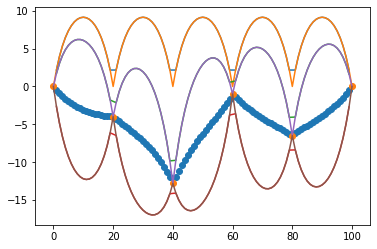

In [15]:
plt.scatter(unknown_indexes,esp_cond)
plt.scatter(observation_indexes,depth)
plt.plot(unknown_indexes,X)
plt.plot(builder([0,0,0,0,0,0],observation_indexes,X,N))
plt.plot(unknown_indexes,esp_cond+X)
plt.plot(unknown_indexes,esp_cond-X)
plt.plot(builder(depth,observation_indexes,esp_cond+X,N))
plt.plot(builder(depth,observation_indexes,esp_cond-X,N))

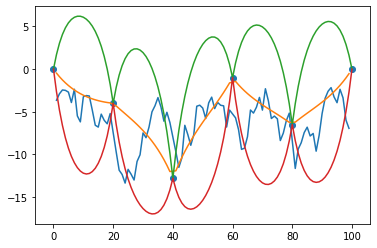

In [29]:
L = np.linalg.cholesky(cov_cond)
L = L.transpose()

def simul( L ):
    f= lambda u,v : np.sqrt(-2*np.log(u))*np.cos(2*np.pi*v)
    g= lambda u,v : np.sqrt(-2*np.log(u))*np.sin(2*np.pi*v)
    Y = np.random.normal(0,1,len(unknown_indexes))
    Z = np.array([mu for i in range(len( unknown_indexes))])+ L@ Y
    return Z
Z = simul(L)
plt.plot(unknown_indexes,Z)


plt.plot(unknown_indexes, esp_cond)
plt.plot(builder(depth,observation_indexes,esp_cond+X,N))
plt.plot(builder(depth,observation_indexes,esp_cond-X,N))
plt.scatter(observation_indexes,depth)

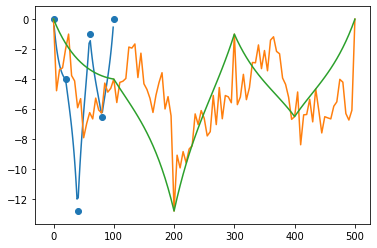

In [17]:
def builder(depth,observation_indexes, Z , N):
    prof = []
    depth_ =list(depth)
    Z_ = list(Z)
    for i in range (N):

        if i in observation_indexes :
            prof.append(depth_.pop(0))
        else : 
            prof.append(Z_.pop(0))
    return prof
prof = builder(depth, observation_indexes,Z,N)

plt.plot(unknown_indexes, esp_cond)
plt.plot([i*Delta for i in range(N)],prof)
plt.scatter(observation_indexes,depth)
plt.plot([i*Delta for i in range(N)],builder(depth,observation_indexes,esp_cond,N))

def longueur ( prof, delta):
    S = 0
    for i in range(1,len(prof)):
        S+= np.sqrt(delta**2 +(prof[i]-prof[i-1])**2)
    return S





In [22]:
def simul_N ( Number , Delta):
    length = []
    for i in range (Number):
        length.append(longueur(builder(depth,observation_indexes,simul(L),N),Delta))
    return np.mean(length)



In [30]:
print(Delta)
L_th = longueur(builder(depth,observation_indexes,esp_cond,N),Delta)
L_th


5.0


501.6468416918411

In [26]:
a= np.sqrt(100**2 +16)+np.sqrt(100**2 +81)+np.sqrt(100**2+12**2) +   np.sqrt( 100**2 +5.5**2)+ np.sqrt(100**2 +6.5**2)
a

501.56374082865335